# 1.Definision
## Domain Background  
In the last year we had a project to make the diagnosis system for a hospital this project was about 
the database and the system of the hospital only. But as an improvement I thought about adding 
what I’ve learnt here to the system where the user adds the symptoms and get an output of what 
disease he might have.  
## Problem Statement  
Before the patient goes to the doctor we need to provide an initial point of what disease the patient 
might have. Also if the patient wants to see what disease he might have from the website. I got some 
diseases with their symptoms from a kaggle dataset that needed to be trained by a model to get the 
disease.  
## Datasets and Inputs  
I found a dataset in kaggle about this topic, this dataset has the disease in a column with its 
symptoms in the rest of the row. This dataset has 41 diseases with 130 different symptoms also the 
diseases is repeated with each possible symptom attached to each row in 304 row after removing 
dublicates.  
The data isn’t quite balanced from 5:10 sample per disease.  
The data set is provided in this link:  
https://www.kaggle.com/itachi9604/disease-symptom-description-dataset?select=dataset.csv  
## Solution Statement  
As the user inputs his symptoms, we have to pass these symptoms to the endpoint, which have a
trained model based on the collected dataset, to get what disease he might have most. The 
symptoms the user will choose from the template he sees. Then after predicting the disease the 
results will be shown to him.  
## Benchmark Model  
For this problem support vector machine model might be a good starting we will be fed the data 
into the model and get the disease with its percentage.  
## Evaluation Metrics  
Based on the dataset, the evaluation metrics would be 80% accuracy score.
## Project Design  
Many part of the project will be in the preprocessing the data to have the desired input. As the csv 
data has to be the symptoms in the columns and each cell indicates is this symptom and disease 
related or not (1 or 0). This cleaned data is to be fed to the model to be trained. Same process will be 
applied to the user input before it’s fed to the trained model

# 2.Analysis

## 2.1 Gathering The Data
used data from kaggle in the following link:  
https://www.kaggle.com/itachi9604/disease-symptom-description-dataset?select=dataset.csv  
this data after removing duplicates.

In [3]:
# import the required modules
import pandas as pd
import numpy as np
import os
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [93]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Data exploration and Preprocessing

In [94]:
df1 = df.copy()

In [95]:
df.Disease.value_counts()

Chicken pox                                10
Migraine                                   10
Dengue                                     10
Hepatitis D                                10
Common Cold                                 9
Hepatitis E                                 9
Hepatitis B                                 9
Diabetes                                    9
hepatitis A                                 9
Jaundice                                    9
Pneumonia                                   9
Tuberculosis                                9
Typhoid                                     9
Hypoglycemia                                9
Hyperthyroidism                             9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Bronchial Asthma                            7
Hepatitis C                       

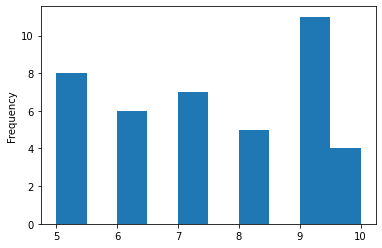

In [96]:
df['Disease'].value_counts().plot(kind='hist', rot=0);

### cleaning the data

In [97]:
# here we see the first column to be meaningless
df.columns

Index(['Unnamed: 0', 'Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
       'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13',
       'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [98]:
# so i dropped this column
df.drop(columns=df.columns[0], inplace=True)

In [99]:
# checking for duplicated data
sum(df.duplicated())

0

In [174]:
# we see that the data isn't prepared to be put in the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     304 non-null    object
 1   Symptom_1   304 non-null    object
 2   Symptom_2   304 non-null    object
 3   Symptom_3   304 non-null    object
 4   Symptom_4   272 non-null    object
 5   Symptom_5   234 non-null    object
 6   Symptom_6   186 non-null    object
 7   Symptom_7   158 non-null    object
 8   Symptom_8   140 non-null    object
 9   Symptom_9   120 non-null    object
 10  Symptom_10  110 non-null    object
 11  Symptom_11  68 non-null     object
 12  Symptom_12  47 non-null     object
 13  Symptom_13  30 non-null     object
 14  Symptom_14  19 non-null     object
 15  Symptom_15  18 non-null     object
 16  Symptom_16  10 non-null     object
 17  Symptom_17  1 non-null      object
dtypes: object(18)
memory usage: 42.9+ KB


### preprocess the data for the model

In [158]:
def make_cols(df, col_names):
    '''making an all 0 column for each value in the original data frame'''
    for name in col_names:
        if not name:
            continue
        df[name] = 0
    return df

In [159]:
def data_in_cols(col_name, df):
    '''putting the data in the newly created columns'''
    for val in df[col_name].unique():
        df.loc[df[col_name] == val, val] = 1
    return df

In [166]:
df.loc?

In [175]:
# get the name of the diseases to be used in the notebook
Diseases = df.Disease.unique()

In [176]:
# applling the previous created 2 functions 
for col in df.columns[:18]:
    #df = make_cols(df, df[col].unique())
    df = data_in_cols(col, df)
df.shape

(304, 191)

In [182]:
# testing that the data is processed right
for i in range(df.shape[0]):
    for name in df.columns[1:5]:
        f = df.iloc[i][name]
        if df.iloc[i][f]==0:
            print(i)


In [184]:
# checking the columns
df.columns

Index([                        'Disease',                       'Symptom_1',
                             'Symptom_2',                       'Symptom_3',
                             'Symptom_4',                       'Symptom_5',
                             'Symptom_6',                       'Symptom_7',
                             'Symptom_8',                       'Symptom_9',
       ...
                ' abnormal_menstruation', ' receiving_unsterile_injections',
                                 ' coma',                 ' sinus_pressure',
                         ' palpitations',               ' stomach_bleeding',
                           ' runny_nose',                     ' congestion',
                      ' blood_in_sputum',                  ' loss_of_smell'],
      dtype='object', length=191)

In [185]:
# dropping the unneeded original columns
df.drop(columns=df.columns[0:18], inplace=True)

In [186]:
# while going through the data there was a NaN column
df.drop(columns=np.NaN, inplace=True)

In [229]:
# here we shuffle our data and check the shape
# it's supposed to be 131 symptom and 41 disease
df = df.sample(frac=1).reset_index(drop=True)
df.fillna(0, inplace=True)
df.shape

(304, 172)

### deviding train and test set

In [230]:
from sklearn import preprocessing

# we get the data of the diseases
y = df[Diseases]
y.shape == (304, 41)

True

In [231]:
X = df.iloc[:, 41:]
X.shape == (304, 131)

True

In [232]:
count_symp = {}
for name in X.columns:
    count_symp[name] = X[name].value_counts()[1]

In [233]:
import operator

dict(sorted(count_symp.items(), key=operator.itemgetter(1), reverse=True))



{' fatigue': 134,
 ' vomiting': 117,
 ' high_fever': 89,
 ' loss_of_appetite': 81,
 ' nausea': 77,
 ' headache': 74,
 ' abdominal_pain': 70,
 ' yellowish_skin': 61,
 ' yellowing_of_eyes': 58,
 ' chills': 53,
 ' malaise': 53,
 ' joint_pain': 46,
 ' sweating': 43,
 ' skin_rash': 42,
 ' chest_pain': 42,
 'itching': 41,
 ' dark_urine': 41,
 ' cough': 36,
 ' diarrhoea': 35,
 ' irritability': 35,
 ' muscle_pain': 35,
 ' excessive_hunger': 34,
 ' weight_loss': 32,
 ' lethargy': 32,
 ' mild_fever': 27,
 ' breathlessness': 26,
 ' swelled_lymph_nodes': 26,
 ' phlegm': 26,
 ' blurred_and_distorted_vision': 25,
 ' red_spots_over_body': 19,
 ' dizziness': 17,
 ' depression': 17,
 ' fast_heart_rate': 17,
 ' abnormal_menstruation': 17,
 ' restlessness': 16,
 ' loss_of_balance': 16,
 ' acidity': 15,
 ' indigestion': 15,
 ' back_pain': 15,
 ' mood_swings': 15,
 ' obesity': 15,
 ' muscle_weakness': 14,
 ' stiff_neck': 14,
 ' constipation': 13,
 ' continuous_sneezing': 12,
 ' family_history': 12,
 ' stom

here we find the most repeated symptom accross the dataset to be itching

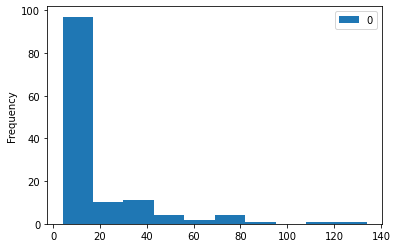

In [234]:
pd.DataFrame.from_dict(count_symp, orient='index').plot(kind='hist', rot=0);

we see here that most of the symptoms are repeated 1:20 accross the data

In [235]:
# getting the symptom names for the lambda func
print(X.columns[:50])
print(X.columns[50:])

Index(['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
       ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
       ' muscle_wasting', ' patches_in_throat', ' fatigue', ' weight_loss',
       ' sunken_eyes', ' cough', ' headache', ' chest_pain', ' back_pain',
       ' weakness_in_limbs', ' chills', ' joint_pain', ' yellowish_skin',
       ' constipation', ' pain_during_bowel_movements', ' breathlessness',
       ' cramps', ' weight_gain', ' mood_swings', ' neck_pain',
       ' muscle_weakness', ' stiff_neck', ' pus_filled_pimples',
       ' burning_micturition', ' bladder_discomfort', ' high_fever',
       ' nodal_skin_eruptions', ' ulcers_on_tongue', ' loss_of_appetite',
       ' restlessness', ' dehydration', ' dizziness',
       ' weakness_of_one_body_side', ' lethargy', ' nausea', ' abdominal_pain',
       ' pain_in_anal_region', ' sweating', ' bruising',
       ' cold_hands_and_feets', ' anxiety', ' knee_pain'],
      dtype='object')
Index([' swelling_joi

In [239]:
# getting the disease names for the lambda func
y.columns

Index(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
       'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'],
      dtype='object')

In [240]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [241]:
y_test.shape

(31, 41)

In [242]:
X_train

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,...,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
285,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### save data

In [243]:
# saving our data localy

pd.concat([pd.DataFrame(y_test), pd.DataFrame(X_test)], axis=1).to_csv('test.csv', header=False, index=False)

pd.concat([pd.DataFrame(y_train), pd.DataFrame(X_train)], axis=1).to_csv('train.csv',
                                                                         header=False, index=False)

## 2.3 Training and Testing the model

### upload the data to the session

In [1]:
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri

session = sagemaker.Session()

bucket = session.default_bucket()
prefix = 'Diagnosis_System_prediction'

role = sagemaker.get_execution_role()

In [245]:
# uploading the data to s3
test_location = session.upload_data('test.csv', key_prefix=prefix)
train_location = session.upload_data('train.csv', key_prefix=prefix)

In [2]:
train_location = 's3://sagemaker-us-east-2-508627596001/Diagnosis_System_prediction/train.csv'

### SVC model

In [5]:
from sagemaker.sklearn.estimator import SKLearn

# specify an output path
# prefix is specified above
output_path = 's3://{}/{}'.format(bucket, prefix)

# instantiate a pytorch estimator
estimator = SKLearn(entry_point='train.py',
                    # source_dir='source_sklearn',
                    role=role,
                    train_instance_count=1,
                    train_instance_type='ml.m5.xlarge',
                    output_path=output_path,
                    sagemaker_session=session,
                    py_version='py3',
                    framework_version='0.20.0',
                    #hyperparameters={
                    #    'epochs': 200
                    #}
                   )

train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [6]:
estimator.fit({'train': train_location})

2021-08-22 04:33:52 Starting - Starting the training job...
2021-08-22 04:34:15 Starting - Launching requested ML instancesProfilerReport-1629606831: InProgress
......
2021-08-22 04:35:15 Starting - Preparing the instances for training......
2021-08-22 04:36:16 Downloading - Downloading input data...
2021-08-22 04:36:51 Training - Training image download completed. Training in progress.
2021-08-22 04:36:51 Uploading - Uploading generated training model2021-08-22 04:36:41,103 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2021-08-22 04:36:41,110 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2021-08-22 04:36:41,125 sagemaker_sklearn_container.training INFO     Invoking user training script.
2021-08-22 04:36:41,417 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2021-08-22 04:36:47,663 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2021-08-22 0

### testing and deploying the model

In [7]:
test_location = 's3://sagemaker-us-east-2-508627596001/Diagnosis_System_prediction/test.csv'

In [8]:
#xgb_transformer = estimator.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')
scv = estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')



-----------------!

In [49]:
scv.endpoint

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


'sagemaker-scikit-learn-2021-08-22-04-41-55-040'

In [9]:
test_data = pd.read_csv(os.path.join(test_location), header=None, names=None)

In [10]:
test_y = test_data.iloc[:,:41]
test_x = test_data.iloc[:,41:]


In [11]:
import sklearn.metrics as metrics


test_y_preds = scv.predict(test_x)

# Second: calculate the test accuracy
accuracy = metrics.accuracy_score(test_y, test_y_preds)

print(accuracy)


1.0


the model just doing an amzing jop and fits the test set perfectly

In [66]:
endpoint_name = scv.endpoint
x = [0] * 131
response = session.sagemaker_runtime_client.invoke_endpoint(
                                                EndpointName = endpoint_name,
                                                ContentType = 'text/csv',
                                                Body = (','.join([str(val) for val in test_x.iloc[0]])+'\n'+(','.join([str(val) for val in x]))).encode('utf-8'))

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [67]:
# reading the response
x = response['Body'].read().decode('utf-8')

In [100]:
# to get the disease from the list
diseases = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
       'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

In [101]:
# parsing integers from the response
o = re.findall(r'\d+', x)[:41]
diseases[o.index('1')]


'Heart attack'

In [85]:
try:
    boto3.client('sagemaker').delete_endpoint(EndpointName=scv.endpoint)
    print('Deleted {}'.format(scv.endpoint))
except:
    print('Already deleted: {}'.format(scv.endpoint))

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Already deleted: sagemaker-scikit-learn-2021-08-22-04-41-55-040


## previous trial
here I learnt that the preprocessing step wasn't done as expexted.  
i rewrote it and wrote and ran a test for it.

In [86]:
import sklearn.metrics as metrics


test_y_preds = dt.predict(test_x)

# Second: calculate the test accuracy
accuracy = metrics.accuracy_score(test_y, test_y_preds)

print(accuracy)


0.5483870967741935


as we see the model performed poorly here  
so i ran the code below to know why exactly this is happening

In [113]:
missed_pred = np.where(test_y_preds.sum(axis=1)==0)

In [127]:
# getting the labels of miss predicted data
y_test.iloc[missed_pred].sum()

Fungal infection                           1
Allergy                                    0
GERD                                       0
Chronic cholestasis                        0
Drug Reaction                              0
Peptic ulcer diseae                        0
AIDS                                       0
Diabetes                                   0
Gastroenteritis                            0
Bronchial Asthma                           0
Hypertension                               1
Migraine                                   1
Cervical spondylosis                       0
Paralysis (brain hemorrhage)               0
Jaundice                                   0
Malaria                                    1
Chicken pox                                0
Dengue                                     0
Typhoid                                    1
hepatitis A                                1
Hepatitis B                                0
Hepatitis C                                0
Hepatitis 

In [143]:
# here i summed the values to get the number of symptoms provided
x = X_test.iloc[0]
x.sum()

0

In [146]:
# here i summed all the values for the test
X_test.sum(axis=1)

180    0
154    1
111    0
247    2
60     3
9      0
119    2
157    4
167    0
33     4
5      0
101    0
45     0
176    1
118    1
46     0
125    2
193    1
240    5
143    0
229    1
278    6
244    1
25     4
147    0
221    2
255    3
73     0
232    2
109    0
140    0
dtype: int64

In [132]:
df1[df1['Disease'] == 'Fungal infection']

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# AWS Lambda

import json
#import numpy as np  
import boto3  

def get_input_as_list(input, list):  
    my_list = [0] * 131  
    for word in input:  
        my_list[list.index(word)] = 1  
    my_list = [my_list]  
    return my_list  
        

def lambda_handler(event, context):  
    symptoms = ['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
       ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
       ' muscle_wasting', ' patches_in_throat', ' fatigue', ' weight_loss',
       ' sunken_eyes', ' cough', ' headache', ' chest_pain', ' back_pain',
       ' weakness_in_limbs', ' chills', ' joint_pain', ' yellowish_skin',
       ' constipation', ' pain_during_bowel_movements', ' breathlessness',
       ' cramps', ' weight_gain', ' mood_swings', ' neck_pain',
       ' muscle_weakness', ' stiff_neck', ' pus_filled_pimples',
       ' burning_micturition', ' bladder_discomfort', ' high_fever',
       ' nodal_skin_eruptions', ' ulcers_on_tongue', ' loss_of_appetite',
       ' restlessness', ' dehydration', ' dizziness',
       ' weakness_of_one_body_side', ' lethargy', ' nausea', ' abdominal_pain',
       ' pain_in_anal_region', ' sweating', ' bruising',
       ' cold_hands_and_feets', ' anxiety', ' knee_pain',
       ' swelling_joints', ' blackheads', ' foul_smell_of urine',
       ' skin_peeling', ' blister', ' dischromic _patches',
       ' watering_from_eyes', ' extra_marital_contacts', ' diarrhoea',
       ' loss_of_balance', ' blurred_and_distorted_vision',
       ' altered_sensorium', ' dark_urine', ' swelling_of_stomach',
       ' bloody_stool', ' obesity', ' hip_joint_pain', ' movement_stiffness',
       ' spinning_movements', ' scurring', ' continuous_feel_of_urine',
       ' silver_like_dusting', ' red_sore_around_nose', ' spotting_ urination',
       ' passage_of_gases', ' irregular_sugar_level', ' family_history',
       ' lack_of_concentration', ' excessive_hunger', ' yellowing_of_eyes',
       ' distention_of_abdomen', ' irritation_in_anus', ' swollen_legs',
       ' painful_walking', ' small_dents_in_nails', ' yellow_crust_ooze',
       ' internal_itching', ' mucoid_sputum',
       ' history_of_alcohol_consumption', ' swollen_blood_vessels',
       ' unsteadiness', ' inflammatory_nails', ' depression',
       ' fluid_overload', ' swelled_lymph_nodes', ' malaise',
       ' prominent_veins_on_calf', ' puffy_face_and_eyes', ' fast_heart_rate',
       ' irritability', ' muscle_pain', ' mild_fever', ' yellow_urine',
       ' phlegm', ' enlarged_thyroid', ' increased_appetite',
       ' visual_disturbances', ' brittle_nails', ' drying_and_tingling_lips',
       ' polyuria', ' pain_behind_the_eyes', ' toxic_look_(typhos)',
       ' throat_irritation', ' swollen_extremeties', ' slurred_speech',
       ' red_spots_over_body', ' belly_pain', ' receiving_blood_transfusion',
       ' acute_liver_failure', ' redness_of_eyes', ' rusty_sputum',
       ' abnormal_menstruation', ' receiving_unsterile_injections', ' coma',
       ' sinus_pressure', ' palpitations', ' stomach_bleeding', ' runny_nose',
       ' congestion', ' blood_in_sputum', ' loss_of_smell']
      
    diseases = ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
       'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']
  
    words = event['body'].split(',')[:-1]
    inputs = get_input_as_list(words, symptoms) 
    #inputs = np.zeros(len(symptoms))
    #inputs[indeces] = 1
  
    # The SageMaker runtime is what allows us to invoke the endpoint that we've created.
    runtime = boto3.Session().client('sagemaker-runtime')

    # Now we use the SageMaker runtime to invoke our endpoint, sending the review we were given
    response = runtime.invoke_endpoint(EndpointName = 'sagemaker-scikit-learn-2021-08-21-11-57-00-072',
                                       # The name of the endpoint we created
                                       ContentType = 'list',
                                       #Body = ','.join([str(val) for val in bow]).encode('utf-8'))
                                       Body = ','.join([str(val) for val in inputs]))

    # The response is an HTTP response whose body contains the result of our inference
    #result = response['Body'].read().decode('utf-8')
    result = response['Body'].read().index('1')
    result = diseases[result]

    return {
        'statusCode' : 200,
        'headers' : { 'Content-Type' : 'text/plain', 'Access-Control-Allow-Origin' : '*' },
        'body' : str(result)
    }


# HTML webapp

To try the app, download the file index.html and open it in a browser.

# 3.Conclusion

The task seemed quite simple in the beginning but actually became much more difficult because of the preprocessing problem.

The key to find a good result was to figure out how to process the data write and choose the right model for it.

The SVM model is working fine because we can see that the accuracy of the test set is really good.

I decided to keep the multiclass trained model for my deployed endpoint API.

## 3.1 Improvments

the model is doing well for the data provided it needed to be retrained weekly if it is put to use to improve with the client's way of theinking.

## 3.2 Application
The API can now be used as a Diagnosis accictance to help the user has an initial guess about his disease.